In [2]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [3]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ramazan-magomed-mq-55cea/olist_orders_dataset.csv')
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ramazan-magomed-mq-55cea/olist_customers_dataset.csv')
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ramazan-magomed-mq-55cea/olist_order_items_dataset.csv')

In [4]:
orders = pd.merge(orders, customers, on='customer_id')

In [5]:
date_cols = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [6]:
delivered = orders.query('order_status == "delivered"').copy()
delivered['order_period'] = delivered['order_purchase_timestamp'].dt.to_period('M')
delivered['order_period_day'] = delivered['order_purchase_timestamp'].dt.to_period('D')

In [7]:
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08


In [8]:
delivered['cohort'] = delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [9]:
delivered['cohort_day'] = delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [10]:
delivered['days_since_first_order'] = (delivered['order_purchase_timestamp'] - delivered['cohort_day'].dt.start_time).dt.days
delivered['period_number_month'] = (delivered['days_since_first_order'] // 30).astype(int)

In [11]:
df_cohort = delivered.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [12]:
cohort_size = cohort_pivot.iloc[:, 0]

# Проверяем, есть ли нули или NaN в cohort_size, и заменяем на 1, чтобы избежать деления на NaN
cohort_size = cohort_size.replace(0, np.nan)

# Рассчитываем retention
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) 

По итогу я вижу что, возвращаемость клиента в продукт крайне низкая. Можно сказать даже практически и нет ее

In [13]:
del_kolvo = delivered.query('customer_state == "SP"').customer_unique_id.nunique()

In [14]:
date_col = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for cols in date_col:
    delivered[col] = pd.to_datetime(delivered[cols], errors='coerce')

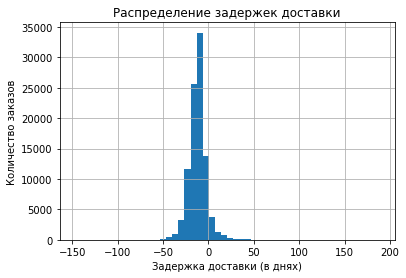

In [15]:
orders["delivery_delay"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days
orders["delivery_delay"].hist(bins=50)

plt.xlabel("Задержка доставки (в днях)")
plt.ylabel("Количество заказов")
plt.title("Распределение задержек доставки")
plt.show()

Можно сказать что задержек в доставок нет. Наооборот даже в большинстве случаев доставки приходят раньше

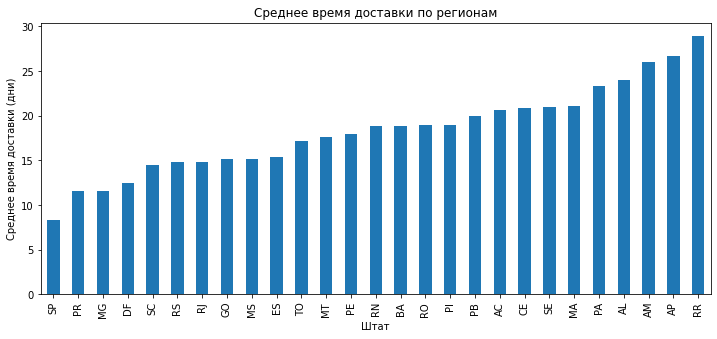

In [16]:
delivered['delivery_time'] = (delivered['order_delivered_customer_date'] - delivered['order_purchase_timestamp']).dt.days

region_delivery = delivered.groupby('customer_state')['delivery_time'].mean().sort_values()
region_delivery.plot(kind='bar', figsize=(12,5))
plt.xlabel('Штат')
plt.ylabel('Среднее время доставки (дни)')
plt.title('Среднее время доставки по регионам')
plt.show()

Но мы можем заметить что в самом популярном штате (который занимает 40% от всех доставок) среднее время доставки самое быстрое. В то время как в отдаленные регионы в разы дольше

In [17]:
del_items = pd.merge(delivered, items, on = 'order_id')

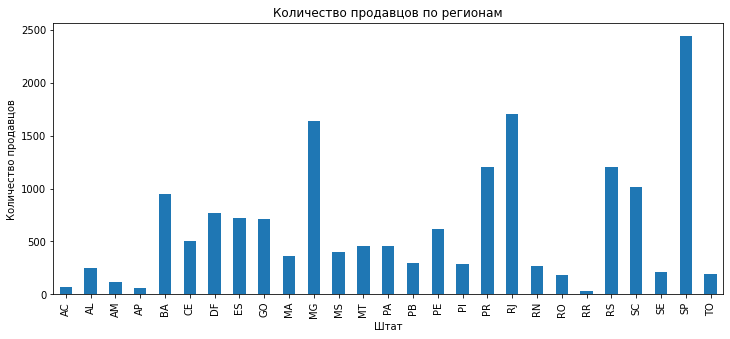

In [18]:
region_sellers = del_items.groupby('customer_state')['seller_id'].nunique()
region_sellers.plot(kind='bar', figsize=(12,5))
plt.xlabel('Штат')
plt.ylabel('Количество продавцов')
plt.title('Количество продавцов по регионам')
plt.show()

Также как дополнительную информацию могу сказать что опять же штат SP выделяется среди всех. Там больше всех продавцов

# На чем сконцентрироваться?
Разобраться, что именно делает SP успешным, и попробовать масштабировать этот опыт

Улучшить ассортимент и логистику в регионах

Рассмотреть механики возврата клиентов (лояльность, скидки, подписки)

Также разобраться почему столь малое количество людей делают повторные покупки

PMF вроде бы и есть но он очень слабый. Либо товары продаваемые на рынке и вовсе не нуждаются в повторной покупке 

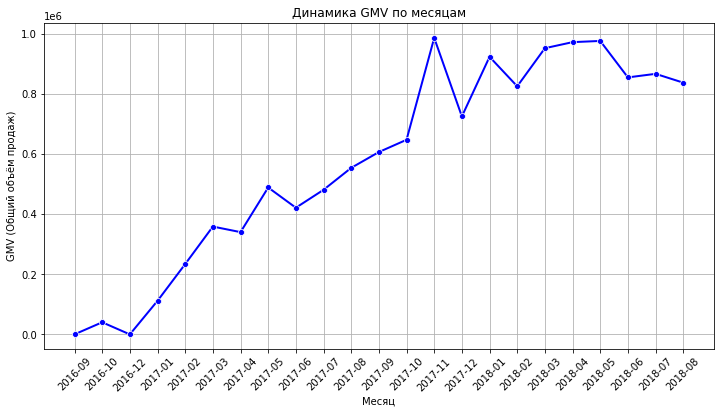

In [19]:
del_items["order_month"] = del_items["order_purchase_timestamp"].dt.to_period("M").astype(str)
monthly_gmv = del_items.groupby("order_month")["price"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_gmv, x="order_month", y="price", marker="o", linewidth=2, color="b")
plt.title("Динамика GMV по месяцам")
plt.xlabel("Месяц")
plt.ylabel("GMV (Общий объём продаж)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day,days_since_first_order,period_number_month,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,28,0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0,0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0,0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0,0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-09,2017-03,2017-03-09,0,0,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-06,2018-02,2018-02-06,0,0,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-27,2017-08,2017-08-27,0,0,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08,2018-01,2018-01-08,0,0,17.0


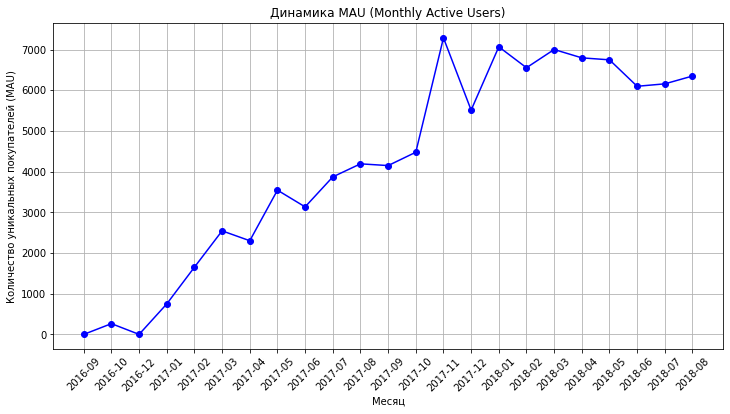

In [32]:
mau = delivered.groupby("order_period")["customer_id"].nunique()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(mau.index.astype(str), mau.values, marker="o", linestyle="-", color="b")
plt.xticks(rotation=45)
plt.xlabel("Месяц")
plt.ylabel("Количество уникальных покупателей (MAU)")
plt.title("Динамика MAU (Monthly Active Users)")
plt.grid(True)
plt.show()

In [33]:
df = delivered

In [39]:
# тут получается мы считаем заинтересованность новых клиентов каждый месяц.
#(условно количество уникальных пользователей каждый месяц)
df["first_purchase_month"] = df.groupby("customer_unique_id")["order_purchase_timestamp"].transform("min").dt.to_period("M")

new_customers = df.groupby("first_purchase_month")["customer_unique_id"].nunique()
new_customers

first_purchase_month
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
2017-03    2503
2017-04    2256
2017-05    3451
2017-06    3037
2017-07    3752
2017-08    4057
2017-09    4004
2017-10    4328
2017-11    7060
2017-12    5338
2018-01    6842
2018-02    6288
2018-03    6774
2018-04    6582
2018-05    6506
2018-06    5878
2018-07    5949
2018-08    6144
Freq: M, Name: customer_unique_id, dtype: int64

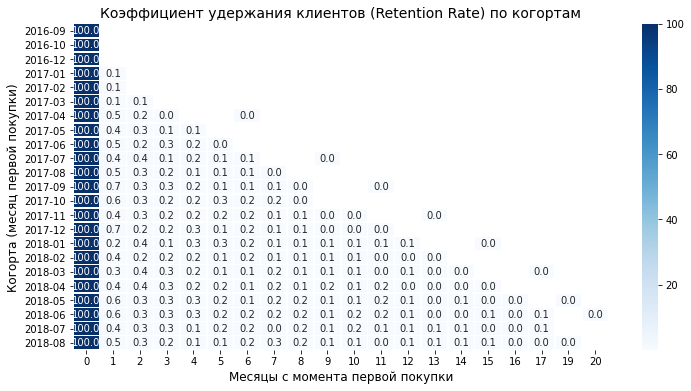

In [40]:
df["months_since_first_purchase"] = (df["order_period"] - df["first_purchase_month"]).apply(lambda x: x.n)

# Создаем когортный анализ
cohort_data = df.groupby(["order_period", "months_since_first_purchase"])["customer_unique_id"].nunique().unstack()

# Рассчитываем Retention Rate
cohort_size = cohort_data.iloc[:, 0]  # Размер когорты (количество клиентов в первый месяц)
retention_matrix = cohort_data.divide(cohort_size, axis=0) * 100  # Процент вернувшихся клиентов

# Визуализация тепловой карты удержания
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)
plt.title("Коэффициент удержания клиентов (Retention Rate) по когортам", fontsize=14)
plt.xlabel("Месяцы с момента первой покупки", fontsize=12)
plt.ylabel("Когорта (месяц первой покупки)", fontsize=12)
plt.show()

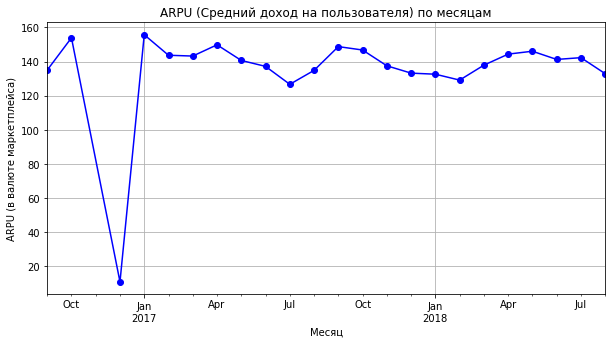

In [25]:
revenue_per_month = del_items.groupby("order_period")["price"].sum()

# Считаем количество уникальных покупателей по месяцам (то что делали недавно тоже самое)
unique_customers_per_month = df.groupby("order_period")["customer_unique_id"].nunique()

# Считаем ARPU (Средний доход на пользователя)
arpu_per_month = revenue_per_month / unique_customers_per_month

# Визуализация ARPU
plt.figure(figsize=(10, 5))
arpu_per_month.plot(marker="o", linestyle="-", color="b")
plt.title("ARPU (Средний доход на пользователя) по месяцам")
plt.xlabel("Месяц")
plt.ylabel("ARPU (в валюте маркетплейса)")
plt.grid()
plt.show()

In [26]:
june = orders.query('order_purchase_timestamp >= "2017-06-01"')

In [27]:
del_items["order_delivered_carrier_date"] = pd.to_datetime(del_items["order_delivered_carrier_date"], errors="coerce")
del_items["shipping_limit_date"] = pd.to_datetime(del_items["shipping_limit_date"], errors="coerce")

In [28]:
del_items = del_items.query('order_purchase_timestamp >= "2017-06-01"')
del_items.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,days_since_first_order,period_number_month,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,...,28,0,8.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,...,0,0,13.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,0,0,9.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08


In [29]:
#Почему я беру order_delivered_carrier_date и shipping_limit_date? потому что как я понимаю shipping_limit_date
# Это крайний срок, к которому продавец обязан передать заказ в логистическую службу.
#А order_delivered_carrier_date по сути фактическая дата. Если разница больше 0 то продавец отгрузил заказ с задержкой.
del_items["delay_to_ship"] = del_items["order_delivered_carrier_date"] - del_items["shipping_limit_date"]
delayed_shipping = del_items[del_items["delay_to_ship"].dt.days > 0]
delayed_shipping

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,period_number_month,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_month,delay_to_ship
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-10-09 22:23:46,d699688533772c15a061e8ce81cb56df,4001,...,0,21.0,1,5ac9d9e379c606e36a8094a6046f75dc,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,109.90,8.96,2017-09,11 days 13:45:54
29,91b2a010e1e45e6ba3d133fa997597be,cce89a605105b148387c52e286ac8335,delivered,2018-05-02 11:45:38,2018-05-03 12:55:01,2018-05-10 16:16:00,2018-05-16 20:56:24,2018-05-16 20:56:24,bd13608b9c6033892ce62269b50a0afc,9182,...,0,14.0,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-09 12:55:01,178.99,13.69,2018-05,1 days 03:20:59
42,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-28 18:59:23,3e4fd73f1e86b135b9b121d6abbe9597,19400,...,0,33.0,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,2017-11,13 days 20:52:56
119,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-09 20:16:40,34c58672601f2c6d29db7efd1f6bf958,38650,...,0,12.0,1,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.30,15.10,2018-01,2 days 05:39:42
122,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2018-01-23 21:38:52,efc37ae565ee0943cca2b89fc65c4d6f,24933,...,0,56.0,1,807b2de93dbb064bbc82dc6ac963bc61,903037660cf848a717166eb7a06d616e,2017-12-06 20:57:24,25.99,14.10,2017-11,7 days 23:40:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109820,46a960198503941a98246a108f151e0b,2c111dddbadc3ca0954979d59bd3fd64,delivered,2017-10-05 19:43:00,2017-10-06 19:35:22,2017-10-23 15:02:55,2017-10-27 18:17:47,2017-10-27 18:17:47,84df86398d857a2ae4a7c085533af669,35430,...,0,21.0,3,95ae4833a7cd4f9f7f90c3b77a993c1b,1025f0e2d44d7041d6cf58b6550e0bfa,2017-10-16 20:35:22,78.00,15.30,2017-10,6 days 18:27:33
109952,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-05 04:24:12,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-15 14:59:50,1d627d8a6e1e33ea8eeeb7a17d998660,11045,...,0,12.0,1,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-09-12 04:24:12,84.90,15.35,2017-09,2 days 18:49:29
110015,141c7645c99eed7a80fa7ec9d6c40ad0,30367cbd4765dc3372734e4a100cbb50,delivered,2018-01-15 15:57:07,2018-01-15 16:12:36,2018-01-26 21:15:16,2018-02-08 15:46:34,2018-02-08 15:46:34,6e489dada3bfdca72a116004ea49c209,23020,...,0,23.0,1,f102842fbe436027eeeb7fc76d3063aa,87142160b41353c4e5fca2360caf6f92,2018-01-19 16:12:36,34.90,16.92,2018-01,7 days 05:02:40
110149,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-21 00:03:26,f690f0caffab80b6f849f08ba1692925,9330,...,0,18.0,1,4f18ca9862f511ecba98258b2194d061,5b0cc932433fa5184b5b94bfe6bcc256,2018-08-08 23:04:06,95.00,24.75,2018-08,6 days 18:37:54


In [30]:
#4257 Получается импакт = 7
impact = 7
confidence = 10
easy = 4

In [31]:
ice = impact * confidence * easy
ice

280

# 5 Задача

На какие метрики повлияет наше изменение?

Во первых RR (retention rate) — коэффициент удержания пользователей.
Если клиент получит заказ вовремя и без проблем, вероятность того, что он вернётся, возрастает.
Уменьшение задержек может улучшить удовлетворенность пользователей, что позитивно повлияет на retention.

Во вторых Time to Ship (время до отгрузки)
Эта метрика напрямую отражает гипотезу: если удастся сократить этот показатель, значит, мы добились успеха.
Чем быстрее заказ отправлен, тем меньше вероятность опоздания доставки.

Также Cancellation Rate (доля отменённых заказов)
Важно убедиться, что ускорение отгрузки не привело к увеличению числа отмен заказов из-за сбоев в процессе.
Если при сокращении времени до отгрузки начинают расти отмены, значит, процесс некачественно оптимизирован.

Также несомненно вырастит GMV - — валовый объём торговых операций — сколько заработали на продаже продукта.


Также в кратце могу предположить о росте таких метрик как :
ARPU - средняя выручка на одного пользователя: сколько денег получает компания от каждого клиента.
Engagement — вовлечённость

# ИТОГИ

# Выводы Задачи 1
Анализ Retention показал крайне низкую возвращаемость клиентов.

Большинство покупателей совершают только один заказ и не возвращаются. 

Это указывает на необходимость поиска причин и их устранения.

# Выводы задачи 2

Мы изучили, есть ли у продукта Product Market Fit (PMF) — удовлетворяет ли он потребности клиентов.

Несмотря на низкий Retention, сам факт спроса говорит о слабом, но всё же присутствующем PMF.

Для роста стоит:Масштабировать успешный опыт региона SP

Улучшить ассортимент и логистику в других регионах

Развивать механики возврата клиентов (скидки, лояльность, подписки)

# Выводы задачи 3

Расчитав метрику GMV (рост объёма продаж, см. выше), можно придти к выводу что с начала продаж на маркетплейсе 2016-09 по 2017-11 был сильный рост объема продаж. После чего объем продаж находится в консолидации. Рост отсутсвует почти год.

Расчитав метрику MAU (количество активных пользователей в месяц, см. выше),можно сказать, что был также рост вплоть до того же 2017-11

Расчитав метрику заинтересованности новых клиентов каждый месяц. Можно также сказать о росте до 2017-11 и последующей консолидации.

Естественно рассчитываем Retention Rate и уже, не удивляясь, видим довольно низкие показатели.

И не беря в расчет декабрь 2017. Можно также увидеть уверенную консолидацию по ARPU (средний доход на клиента)

# Выводы задачи 4

Гипотеза №2 
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество 
заказов увеличится за счёт повторных заказов.

Анализ показал 4 257 заказов с задержками.

Пересчитав влияние на бизнес, получили ICE = 280 (Impact = 7, Confidence = 10, Ease = 4).

# Выводы задачи 5

На какие метрики повлияет должна повлиять наша гипотеза?Во первых RR (retention rate) — коэффициент удержания пользователей.

Во вторых Time to Ship (время до отгрузки)

Также Cancellation Rate (доля отменённых заказов)

Несомненно вырастит GMV (объем продаж)

ARPU - средняя выручка на одного пользователя

Engagement — вовлечённость# 

# Общие выводы

Retention (Возвращаемость клиента) остаётся критически низким, что подтверждает необходимость доработки продукта.

Сильный рост GMV (объема продаж) и MAU (количество активных пользователей) до ноября 2017 сменился стагнацией, что требует поиска точек роста.

Анализ задержек логистики выявил значительное влияние на заказы, что подтверждает актуальность гипотезы о сокращении времени отгрузки

# Какие рекомендации?

Оптимизировать логистику — сократить время отгрузки, ужесточить контроль сроков, мотивировать продавцов выполнять обязательства.

Масштабировать опыт SP — улучшить ассортимент, скорость доставки и поддержку клиентов в других регионах.

Расширить ассортимент — добавить популярные товары, улучшить качество сервиса.

Ввести программы лояльности — скидки, подписки, бонусы за повторные заказы.

Улучшить возврат пользователей — персонализированные рекомендации, рассылки, акции для возвращения клиентов.